In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("sukhmandeepsinghbrar/house-prices-india")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\lamas\.cache\kagglehub\datasets\sukhmandeepsinghbrar\house-prices-india\versions\1


In [3]:
import pandas as pd
import os
import numpy as np
df = pd.read_csv(os.path.join(path, "House Price India.csv"))
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
df.sample(5)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
12997,6762825738,42697,3,1.75,1080,1306,1.0,0,0,3,...,1954,2003,122032,52.8901,-114.590,1440,2225,1,78,331000
774,6762816669,42504,5,1.75,2000,3750,2.0,0,0,4,...,1921,0,122028,52.8918,-114.545,1520,3750,1,79,585000
13032,6762813125,42698,3,1.75,2050,4080,2.0,0,0,3,...,1991,0,122004,52.8998,-114.515,1890,4080,2,78,790000
13988,6762824769,42718,4,2.50,1830,5331,2.0,0,0,3,...,2002,0,122024,52.5857,-114.206,1830,5175,1,60,353000
8433,6762830991,42618,2,1.00,630,6000,1.0,0,0,3,...,1943,2005,122063,52.7273,-114.411,1470,6840,1,75,190000


In [5]:
df.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

## Preprocesamiento para variables categóricas

Principalmente se usa un OneEncoding/LabelEncoding, el trato suele ser muy similar en todos los casos en los que se trabaja con ellas.
LableEncoding: Asignación de un numnero a cada una de las cateogorías, hay que tener cuidado ya que no todos los casos son aplicables a este modelo. Tienen que responder a un orden lógico (1,2,3)
TargetEncoding: se ua en caso de no poder usar ni OHE ni LE. Asignar valores numéricos basados en el "target" medio de cada una de las columnas.
Transformar una columna entera a categorica: 
df["Postal_Code_Categorica"] = pd.Cateogrical(df["postal_Code"])

In [6]:
df["Postal Code"].value_counts(normalize=True)

Postal Code
122028    0.029551
122005    0.028456
122006    0.027156
122007    0.027088
122033    0.026199
            ...   
122013    0.005267
122062    0.004241
122036    0.003352
122060    0.002668
122071    0.002531
Name: proportion, Length: 70, dtype: float64

Media realizada agrupando por CP, en el entregable realziar lo mismo por modelo/tipo de combustible

In [7]:
df.groupby(["Postal Code"])["Price"].mean()

Postal Code
122003    8.384710e+05
122004    8.398533e+05
122005    6.389622e+05
122006    6.136386e+05
122007    5.728347e+05
              ...     
122068    3.153815e+05
122069    4.812247e+05
122070    2.799618e+05
122071    2.348311e+06
122072    2.342158e+05
Name: Price, Length: 70, dtype: float64

In [8]:
df["Postal_code_mean_price"]= df.groupby(["Postal Code"])["Price"].transform("mean")

Sustituir los nulos por valores deseados

In [9]:
df["Price"]=np.where(
    df["Price"].isna(),
    df["Postal_code_mean_price"],
    df["Price"]
)

In [10]:
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Postal_code_mean_price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000.0,839853.280255
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000.0,839853.280255
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000.0,638962.223558
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000.0,613638.622166
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,0,122007,52.9133,-114.590,2380,4750,1,67,790000.0,572834.671717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,0,122066,52.6191,-114.472,2250,17286,3,76,221700.0,248700.344828
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,0,122072,52.5075,-114.393,1540,7480,3,59,219200.0,234215.780303
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,0,122056,52.7289,-114.507,1130,6120,2,64,209000.0,233594.957447
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,0,122042,52.7157,-114.411,1420,6631,3,54,205000.0,298219.325581


In [ ]:
#reducir el numero de variables para el OHE
df["Postal Code"].astype(str).str[:5].unique()

array(['12200', '12201', '12202', '12203', '12204', '12205', '12206',
       '12207'], dtype=object)

In [15]:

df["Postal_code_5_posiciones"]=df["Postal Code"].astype(str).str[:5]

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [23]:
ohe

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [19]:
encoded_postal_code= ohe.fit_transform(df[["Postal_code_5_posiciones"]])

In [24]:
encoded_df=pd.DataFrame(encoded_postal_code, columns=ohe.get_feature_names_out())

In [27]:
encoded_df

,Postal_code_5_posiciones_12200,Postal_code_5_posiciones_12201,Postal_code_5_posiciones_12202,Postal_code_5_posiciones_12203,Postal_code_5_posiciones_12204,Postal_code_5_posiciones_12205,Postal_code_5_posiciones_12206,Postal_code_5_posiciones_12207
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
14614,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14616,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14617,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
# Axis=1 pega los valores a la derecha, Axis= 0 peda valores debajo
df = pd.concat([df, encoded_df], axis= 1)

In [29]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Postal_code_5_posiciones_12206,Postal_code_5_posiciones_12207,Postal_code_5_posiciones_12200,Postal_code_5_posiciones_12201,Postal_code_5_posiciones_12202,Postal_code_5_posiciones_12203,Postal_code_5_posiciones_12204,Postal_code_5_posiciones_12205,Postal_code_5_posiciones_12206,Postal_code_5_posiciones_12207
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Target Encoding

In [32]:
df["Postal Code TE"]= df.groupby(["Postal Code"])["Price"].transform("mean")

In [ ]:
df[[col for col in df.columns if "Postal Code" in col]]

,Postal Code,Postal Code TE
0,122004,839853.280255
1,122004,839853.280255
2,122005,638962.223558
3,122006,613638.622166
4,122007,572834.671717
...,...,...
14614,122066,248700.344828
14615,122072,234215.780303
14616,122056,233594.957447
14617,122042,298219.325581


## Tratado Variables Numéricas

# Escalado y Normalizado

In [41]:
df.sample(5)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Postal_code_5_posiciones_12200,Postal_code_5_posiciones_12201,Postal_code_5_posiciones_12202,Postal_code_5_posiciones_12203,Postal_code_5_posiciones_12204,Postal_code_5_posiciones_12205,Postal_code_5_posiciones_12206,Postal_code_5_posiciones_12207,Psotal Code TE,Postal Code TE
12707,6762817087,42692,3,2.25,2180,9246,2.0,0,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,683505.137931,683505.137931
4640,6762828053,42560,2,1.00,670,6300,1.0,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,413823.047431,413823.047431
258,6762814789,42496,3,1.75,1680,10500,1.0,0,0,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,803538.830508,803538.830508
8494,6762828415,42620,3,2.25,1750,8400,1.0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,279961.807229,279961.807229
10194,6762817405,42649,2,2.00,1930,5520,1.0,0,0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,681425.139785,681425.139785


In [43]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Postal_code_5_posiciones_12200,Postal_code_5_posiciones_12201,Postal_code_5_posiciones_12202,Postal_code_5_posiciones_12203,Postal_code_5_posiciones_12204,Postal_code_5_posiciones_12205,Postal_code_5_posiciones_12206,Postal_code_5_posiciones_12207,Psotal Code TE,Postal Code TE
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,0.130583,0.168685,0.178672,0.148984,0.132088,0.136056,0.087694,0.017238,5.388063e+05,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,0.336956,0.374486,0.383090,0.356085,0.338598,0.342860,0.282859,0.130161,2.344432e+05,2.344432e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.335950e+05,2.335950e+05
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.601148e+05,3.601148e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.136301e+05,5.136301e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.389622e+05,6.389622e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.348311e+06,2.348311e+06


In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [45]:
min_max= MinMaxScaler()
df["Price_MinMax"] = min_max.fit_transform(df[["Price"]])

<Axes: >

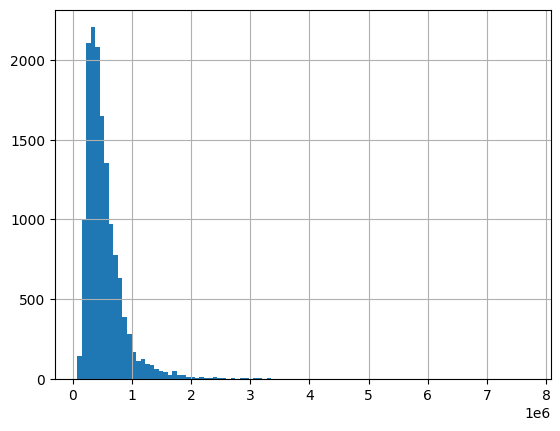

In [46]:
df["Price"].hist(bins=100)

<Axes: >

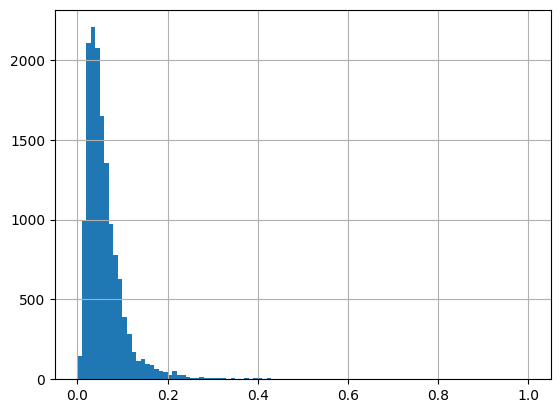

In [48]:
df["Price_MinMax"].hist(bins=100)
#coge todos el valor más caro y le otorga un valor 1, el resto lo ordena en valores de entre 0 y 1

In [49]:
standard_scaler = StandardScaler()
df['Price_Standard_Scaled'] = standard_scaler.fit_transform(df[['Price']])

<Axes: >

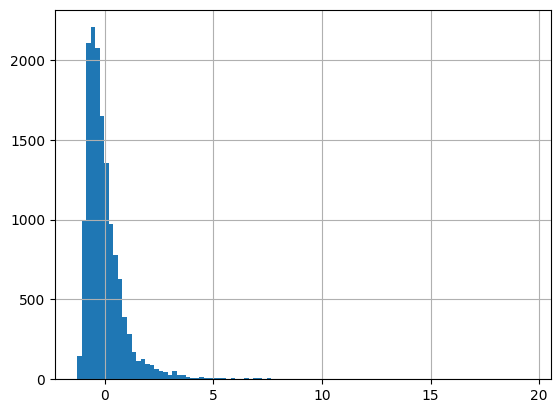

In [54]:
df["Price_Standard_Scaled"].hist(bins=100)
#media de la dispersion de los datos del dataFrame

## Normalizado

In [55]:
df["Price_raiz_cubica"]=df["Price"]**(1/3)

<Axes: >

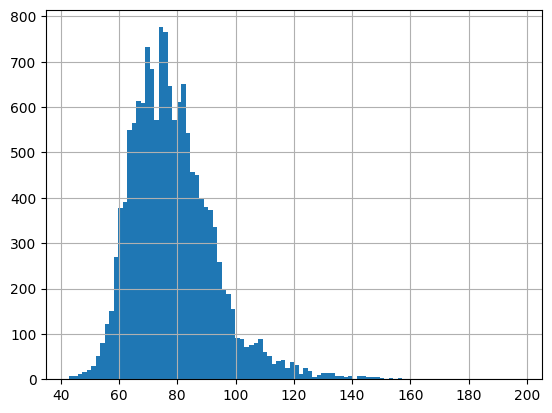

In [56]:
df["Price_raiz_cubica"].hist(bins=100)

In [57]:
df["Price_log"] = np.log1p(df["Price"])

<Axes: >

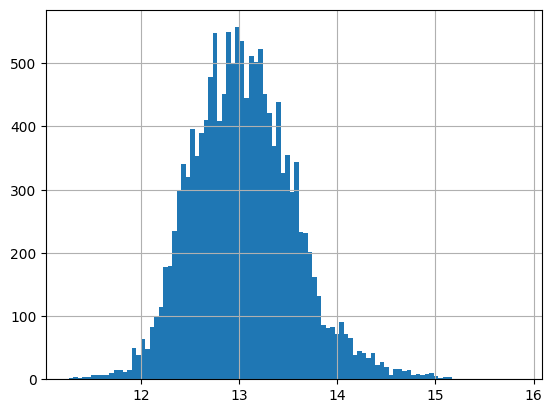

In [58]:
df["Price_log"].hist(bins=100)


In [59]:
#power transform
from sklearn.preprocessing import PowerTransformer

In [60]:
power_transf= PowerTransformer()

<Axes: >

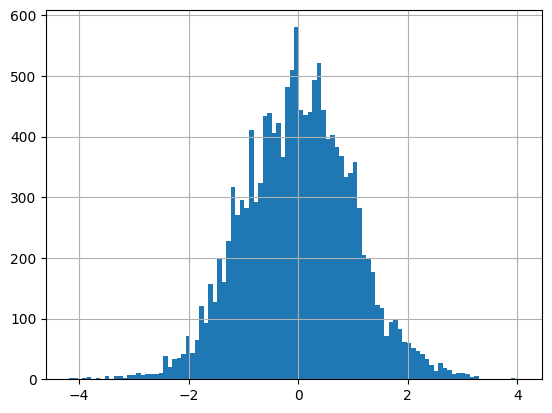

In [62]:
df["Price_Power_trans"] = power_transf.fit_transform(df[["Price"]])

# Visualizar la distribución resultante
df["Price_Power_trans"].hist(bins=100)